<div style="color:navy; background-color:orange; font-size:16px;">Importing the dataset</div>

In [286]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

<div style="color:navy; background-color:orange; font-size:16px;">Downloading the John Hopkins Covid 19 dataset</div>

In [287]:
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports
#!git clone https://github.com/CSSEGISandData/COVID-19.git

In [288]:
import pandas as pd
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv"
df = pd.read_csv(url, error_bad_lines = False)
US = df[df['Country_Region'] == "US"]
d = ['Admin2', 'FIPS', "Lat", "Long_", 'Case_Fatality_Ratio', 'Incident_Rate']
for to_be_deleted in d:
    del US[to_be_deleted]

In [289]:
np.unique(US['Last_Update'])

array(['2020-08-04 02:27:56', '2020-08-07 22:34:20',
       '2020-12-21 13:27:30', '2020-12-29 23:22:37',
       '2021-01-02 05:22:33', '2021-04-02 15:13:53'], dtype=object)

In [291]:
temp_data = US.groupby(by=["Province_State"]).sum().reset_index()

In [292]:
temp_data.head()

,Province_State,Confirmed,Deaths,Recovered,Active
0,Alabama,365747,4872,0,360875.0
1,Alaska,47019,206,0,46780.0
2,Arizona,530267,9015,0,521252.0
3,Arkansas,229442,3711,0,225731.0
4,California,2365024,26504,0,2309915.0


<div style="color:navy; background-color:orange; font-size:16px;">All existing dates</div>

In [260]:
#storing all dates
from datetime import date, timedelta

d1 = date(2020,1,22)
d2 = date(2021,5,18)

#list containing all of the dates
dates = [d1 + timedelta(days=x) for x in range((d2-d1).days + 1)]
all_dates = []
#all_dates[0].day, all_dates[0].month, all_dates[0].year
for d in dates:
    if d.day < 10:
        day = "0"+str(d.day)
    else:
        day = str(d.day)
    if d.month <10:
        month = "0"+str(d.month)
    else:
        month = str(d.month)
    year = str(d.year)
    #print(month+"-"+day+"-"+year)
    all_dates.append(month+"-"+day+"-"+year)    

In [261]:
#all_dates
#all_dates[0].day, all_dates[0].month, all_dates[0].year
#type(all_dates[0].day)

<div style="color:navy; background-color:orange; font-size:16px;">Downloading data corresponding to each particular date</div>

In [317]:
def store_df(index):
    """
    index in the all_dates
    """
    date = all_dates[index]
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + date + ".csv"
    df = pd.read_csv(url, error_bad_lines = False)
    return df
#store_df(123) #date = "01-12-2021" first index in the all_dates list

<div style="color:navy; background-color:orange; font-size:16px;">Cleaning and filtering the dataset</div>

In [368]:
dataset = store_df(60) #first recording for America is in the 60th day of recording
dataset[dataset['Country_Region']=='US'].groupby(by=["Province_State"]).sum().reset_index()[['Province_State', 'Confirmed','Deaths', 'Recovered', "Active"]].head()

,Province_State,Confirmed,Deaths,Recovered,Active
0,Alabama,180,0,0,0
1,Alaska,20,0,0,0
2,American Samoa,0,0,0,0
3,Arizona,152,2,0,0
4,Arkansas,165,0,0,0


In [341]:
def clean_df(index):
    dataset = store_df(index)
    try:
        res = dataset[dataset['Country_Region']=='US'].groupby(by=["Province_State"]).sum().reset_index()[['Province_State', 'Confirmed','Deaths', 'Recovered', "Active"]]
    except:
        print("No information for date")
    return res
clean_df(60).head()

,Province_State,Confirmed,Deaths,Recovered,Active
0,Alabama,180,0,0,0
1,Alaska,20,0,0,0
2,American Samoa,0,0,0,0
3,Arizona,152,2,0,0
4,Arkansas,165,0,0,0


<div style="color:navy; background-color:orange; font-size:16px;">Merging the data corresponding to each date</div>

In [367]:
result = clean_df(60)
result.columns = ['Province_State', 'C60', 'D60', 'R60', 'A60']
#for d in range(60, len(all_dates)):
for d in range(61, len(all_dates)):
    cols = result.columns
    t = clean_df(d)
    result = result.join(t.set_index('Province_State'), on='Province_State')
    result.columns = list(cols) + ["C"+str(d), "D"+str(d), "R"+str(d), "A"+str(d) ]
    if d%50 == 0:
        print("Merging --- {}%".format(np.round(100/len(all_dates)*d),2))

Merging --- 21.0%
Merging --- 31.0%
Merging --- 41.0%
Merging --- 52.0%
Merging --- 62.0%
Merging --- 72.0%
Merging --- 83.0%
Merging --- 93.0%


In [373]:
assert result.shape[1] == (len(all_dates)-60)*4 + 1

In [392]:
result.to_csv("CDAR.csv", sep='\t')

<div style="color:navy; background-color:orange; font-size:16px;">Confirmed cases</div>

In [460]:
Confirmed = ["C"+str(d) for d in range(60, len(all_dates))]
result[['Province_State'] + Confirmed].to_csv("Confirmed.csv", sep='\t')

<div style="color:navy; background-color:orange; font-size:16px;">Death cases</div>

In [461]:
Death = ["D"+str(d) for d in range(60, len(all_dates))]
result[['Province_State'] + Death].to_csv("Death.csv", sep='\t')

<div style="color:navy; background-color:orange; font-size:16px;">Active cases</div>

In [462]:
Active = ["A"+str(d) for d in range(60, len(all_dates))]
result[['Province_State'] + Active].to_csv("Active.csv", sep='\t')

<div style="color:navy; background-color:orange; font-size:16px;">Recovered cases</div>

In [463]:
Recovered = ["R"+str(d) for d in range(60, len(all_dates))]
result[['Province_State'] + Recovered].to_csv("Recovered.csv", sep='\t')

<div style="color:navy; background-color:orange; font-size:16px;">The results for a particular state</div>

In [397]:
result[result.Province_State =="Iowa"]

,Province_State,C60,D60,R60,A60,C61,D61,R61,A61,C62,...,R480,A480,C481,D481,R481,A481,C482,D482,R482,A482
19,Iowa,90,0,0,0,105.0,0.0,0.0,0.0,124.0,...,0.0,0.0,369494.0,6006.0,0.0,0.0,369693.0,6013.0,0.0,0.0


In [424]:
California = result[result.Province_State =="California"]
NewYork = result[result.Province_State =="New York"]
California[['Province_State'] + Confirmed]

,Province_State,C60,C61,C62,C63,C64,C65,C66,C67,C68,...,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482
5,California,1646,2108.0,2538.0,2998.0,3899.0,4657.0,5095.0,5852.0,7138.0,...,3758137.0,3760303.0,3761779.0,3763281.0,3764405.0,3767052.0,3768087.0,3768805.0,3769827.0,3771240.0


<div style="color:navy; background-color:orange; font-size:16px;">Plotting the results for a particular state (CA and NY)</div>

In [426]:
confirmed_cal = list(California[['Province_State'] + Confirmed].iloc[0])[1:]
confirmed_ny= list(NewYork[['Province_State'] + Confirmed].iloc[0])[1:]

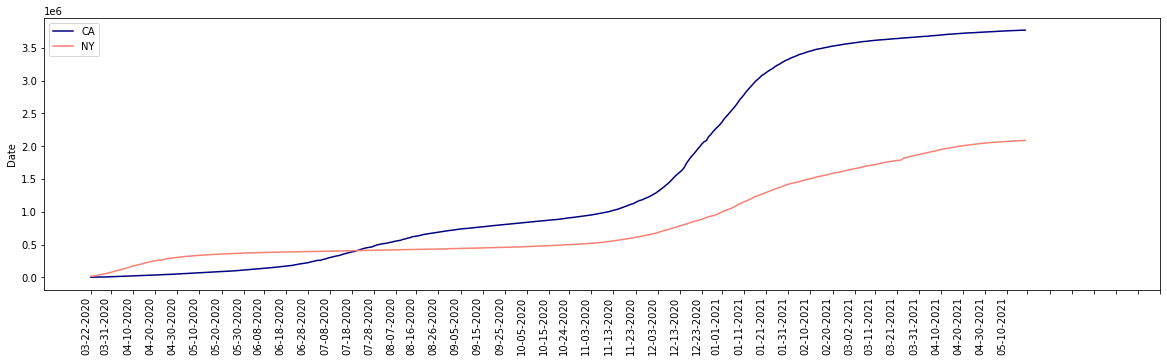

In [459]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.ylabel('#Confirmed', fontsize=10)
plt.ylabel('Date', fontsize=10)
plt.plot(all_dates[60:], confirmed_cal, color = "navy", label="CA")
plt.plot(all_dates[60:], confirmed_ny, color = "salmon", label="NY")
plt.xticks([int(i) for i in np.linspace(0, len(all_dates), 50)])
plt.legend(loc = "upper left")
plt.show()

<div style="color:navy; background-color:orange; font-size:16px;">Adding the vaccination data</div>